## 精准度和召回率的平衡

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.86746987951807231

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [7]:
log_reg.decision_function(X_test)[:10]

array([-22.05700185, -33.02943631, -16.21335414, -80.37912074,
       -48.25121102, -24.54004847, -44.39161228, -25.0429358 ,
        -0.97827574, -19.71740779])

In [8]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
decision_scores = log_reg.decision_function(X_test)

In [10]:
np.min(decision_scores)

-85.686124167491727

In [11]:
np.max(decision_scores)

19.889606885682948

In [12]:
y_predict_2 = decision_scores >= 5

In [13]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = decision_scores >= threshold
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

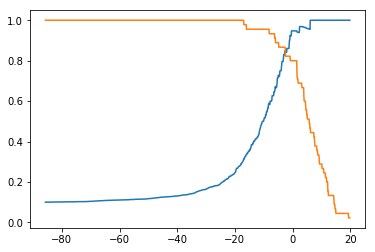

In [16]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()